## Notebook to graph the logsegment usage for a sybase database

This notebook will do a plot of the log segment free spaces

All the information is loaded from a *-csv like* file generated by shell script **get_sybase_log_usage.sh**

**get_sybase_log_usage.sh** (get_sybase_log_usage.sh `<`DSERVER`>` `<`DBASE`>` `<`USER`>` `<`PASSWORD`>` `<`SAMPLING PERIOD IN SECONDS`>`) will generate an output of this format

    16/03/11 09:46:24|10091879
    16/03/11 09:47:54|10091879
    16/03/11 09:49:24|10091879

The file is read in a pandas object then graph with matplotlib

All you have to do is change the code below to point to your output file

    filename = 'D:/Tmp/MEDIOBANCA/log_segment_monitor/MX553ZN_MX_201602_20160311_094454_22659.log'

### <font color='blue'> Beginning of the program </font>

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
from pandas import DataFrame, Series
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

#set options for pandas
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

#set options for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.mpl_style='default'

In [2]:
page_size = 4.0 # variable defining the page size of the database

In [3]:
filename = 'D:/Tmp/MEDIOBANCA/log_segment_monitor/MX553ZN_MX_201602_20160311_094454_22659.log'
# load the .csv file in a dataFrame object (pandas)
data = pd.read_csv(filename,sep='|')
#data.shape, data.keys(),data.index, data.columns  # display the number of rows in the dataFrance and the column names

In [4]:
# the date in the .csv file is a string that must be converted to a date object
# x will be used for the x-axis
x = [dt.datetime.strptime(d," %y/%m/%d %H:%M:%S") for d in data.timestamp]
# type(x)
# we set the timestamp column as an index in case we want to search per index
# be carefull changing the index of a DataFrame creates a new object

In [5]:
#data, data.columns, data.logsegment_free_pages

In [6]:
# we set the timestamp column as an index in case we want to search per index
data_ind_time = data.set_index('timestamp', drop = True)

In [7]:
#data_ind_time, data_ind_time.columns, data_ind_time.index, data_ind_time.logsegment_free_pages

In [8]:
y = np.array(data.logsegment_free_pages)*page_size/1024/1024  # we convert the number of free pages to Gb
#y # display the logsegment usage information

#### <font color='blue'> A quick statistics about logsegment free pages (1 page is 4kb) </font>

In [9]:
data.logsegment_free_pages.describe()

count        4140.000000
mean     10050931.829710
std        433130.064267
min       2733720.000000
25%      10091879.000000
50%      10091879.000000
75%      10091879.000000
max      10091879.000000
Name: logsegment_free_pages, dtype: float64

#### <font color='blue'> let's plot the free space on the logsegment over time </font>

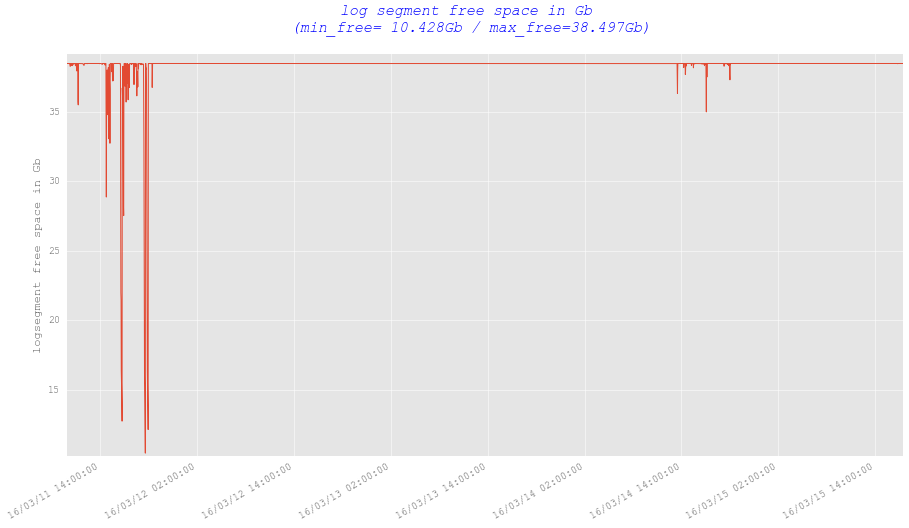

In [10]:
max_free = data.logsegment_free_pages.describe()['max']*page_size/1024/1024 # get max free pages in Gb
min_free =data.logsegment_free_pages.describe()['min']*page_size/1024/1024 # get min free pages in Gb

minorLocator = AutoMinorLocator()  # compute automatically the minor tick to place on x-axis, no label for those ticks
plt.figure(figsize=(15,8))  # define the size of the graph
plt.style.use('ggplot') # define the graph predefined style
plt.gca().set_ylabel('logsegment free space in Gb') #add a label to the y-axis of the axe
plt.suptitle('log segment free space in Gb \n(min_free= %6.3fGb / max_free=%6.3fGb)' % (min_free,max_free), 
             fontsize=15,style='oblique', color='blue') #define a title containing some statistics about log segment free space
plt.ylim(np.nanmin(y)*0.98,np.nanmax(y)*1.02)  # define the limits for y so the plot is not stick to the upper limit of the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
plt.plot(x,y)

#### <font color='blue'> Let's seek for specific values by checking the top values for example </font>

In [11]:
# here I want the 20 values where log free where min
data_ind_time.sort_values(['logsegment_free_pages'], ascending=True).head(20) 

                    logsegment_free_pages
timestamp                                
 16/03/11 19:36:28                2733720
 16/03/11 19:34:58                3086925
 16/03/11 19:57:31                3178760
 16/03/11 16:43:48                3337757
 16/03/11 19:56:01                3502702
 16/03/11 19:33:28                3685791
 16/03/11 16:42:18                3705873
 16/03/11 19:54:31                3827819
 16/03/11 16:40:48                3945316
 16/03/11 19:31:58                3990475
 16/03/11 19:53:01                4023096
 16/03/11 16:39:17                4103659
 16/03/11 19:30:28                4186339
 16/03/11 19:51:29                4261965
 16/03/11 16:37:46                4290047
 16/03/11 19:49:59                4385532
 16/03/11 16:36:16                5631225
 16/03/11 19:28:58                5667325
 16/03/11 16:34:46                5762493
 16/03/11 19:48:29                6113558

In [12]:
# you can select a slice of metrics to display based on the timestamp
new_data = data_ind_time.loc[' 16/03/11 16:30:00':' 16/03/11 17:00:00'].copy()

In [13]:
#new_data.index

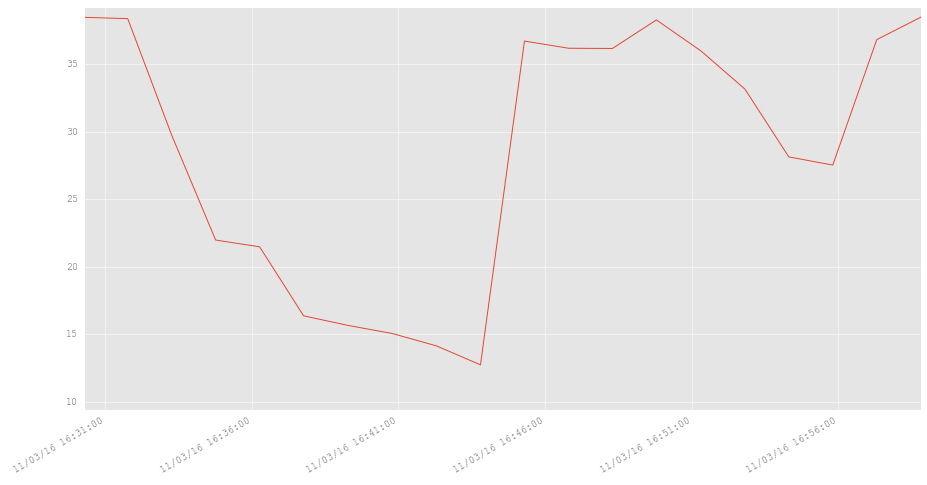

In [14]:
plt.figure(figsize=(15,8))  # define the size of the graph
plt.style.use('ggplot') # define the graph predefined style
plt.ylim(np.nanmin(y)*0.9,np.nanmax(y)*1.02)  # define the limits for y so the plot is not stick to the upper limit of the graph
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(' %y/%m/%d %H:%M:%S'))
plt.gca().xaxis.set_minor_locator(minorLocator)  # define the position of the minor ticks
plt.gca().xaxis_date()
plt.gcf().autofmt_xdate()
plt.plot(new_data.index,np.array(new_data)*page_size/1024/1024)